In [ ]:
# For running inference on the TF-Hub module.
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D,AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from keras.utils.data_utils import get_file
import os

# For drawing onto the image.
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageOps

# For measuring the inference time.
import time
import os
# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.8.2
The following GPU devices are available: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_directory = '/content/drive/MyDrive/ieee-final-round/train_filtered'  # change this line only 

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory= train_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256), # change this to 256
    shuffle=True,
    seed=60,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=60,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,

)


Found 10933 files belonging to 8 classes.
Using 8747 files for training.
Found 10933 files belonging to 8 classes.
Using 2186 files for validation.


In [ ]:
def normalize(image,label):
    image = image/255.
    return image,label

In [ ]:
train_data = train_data.map(normalize)
val_data = val_data.map(normalize)

In [ ]:
pip install vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa
from vit_keras import vit, utils

In [ ]:
image_size = (256 , 256)
classes = 8
vit_model = vit.vit_b16(
    image_size=image_size,
    activation='relu',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

/usr/local/lib/python3.7/dist-packages/vit_keras/utils.py:83: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  UserWarning,


In [ ]:
for layer in vit_model.layers:
  layer.trainable = False

In [ ]:
last_layer = vit_model.get_layer(vit_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 768)
KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='ExtractToken/strided_slice:0', description="created by layer 'ExtractToken'")


In [ ]:
x = Flatten()(last_output) 
x = tf.keras.layers.Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

vit_model = Model(vit_model.input, x)

In [ ]:
vit_model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:
EPOCHS = 13
BATCH_SIZE = 32

history = vit_model.fit(train_data ,                      
                             validation_data = val_data, 
                             epochs=EPOCHS,
                              batch_size = BATCH_SIZE
                              )

Epoch 1/13
274/274 [==============================] - 230s 836ms/step - loss: 1.5274 - acc: 0.4550 - val_loss: 1.1066 - val_acc: 0.6157
Epoch 2/13
274/274 [==============================] - 225s 821ms/step - loss: 1.1794 - acc: 0.5892 - val_loss: 0.9942 - val_acc: 0.6464
Epoch 3/13
274/274 [==============================] - 226s 824ms/step - loss: 1.0662 - acc: 0.6259 - val_loss: 0.9517 - val_acc: 0.6565
Epoch 4/13
274/274 [==============================] - 227s 824ms/step - loss: 1.0200 - acc: 0.6367 - val_loss: 0.8716 - val_acc: 0.6917
Epoch 5/13
274/274 [==============================] - 226s 822ms/step - loss: 0.9793 - acc: 0.6568 - val_loss: 0.8570 - val_acc: 0.7091
Epoch 6/13
274/274 [==============================] - 225s 819ms/step - loss: 0.9289 - acc: 0.6694 - val_loss: 0.8305 - val_acc: 0.7155
Epoch 7/13
274/274 [==============================] - 224s 816ms/step - loss: 0.9249 - acc: 0.6754 - val_loss: 0.8191 - val_acc: 0.7132
Epoch 8/13
274/274 [============================

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

history = vit_model.fit(train_data ,                      
                             validation_data = val_data, 
                             epochs=EPOCHS,
                              batch_size = BATCH_SIZE
                              )

Epoch 1/30
274/274 [==============================] - 1742s 6s/step - loss: 1.2239 - acc: 0.5748 - val_loss: 1.0433 - val_acc: 0.6199
Epoch 2/30
274/274 [==============================] - 223s 813ms/step - loss: 0.9008 - acc: 0.6863 - val_loss: 0.9978 - val_acc: 0.6523
Epoch 3/30
274/274 [==============================] - 223s 813ms/step - loss: 0.7780 - acc: 0.7295 - val_loss: 0.9038 - val_acc: 0.6747
Epoch 4/30
274/274 [==============================] - 225s 818ms/step - loss: 0.6846 - acc: 0.7572 - val_loss: 0.8656 - val_acc: 0.7031
Epoch 5/30
274/274 [==============================] - 225s 818ms/step - loss: 0.6333 - acc: 0.7756 - val_loss: 0.8000 - val_acc: 0.7260
Epoch 6/30
274/274 [==============================] - 224s 817ms/step - loss: 0.5874 - acc: 0.7922 - val_loss: 0.8212 - val_acc: 0.7242
Epoch 7/30
274/274 [==============================] - 225s 817ms/step - loss: 0.5475 - acc: 0.8079 - val_loss: 0.8585 - val_acc: 0.7127
Epoch 8/30
274/274 [==============================

In [ ]:
vit_model.save('/content/drive/MyDrive/ieee-final-round/vit2.h5')

In [ ]:
cleaned_path = '/content/drive/MyDrive/ieee-final-round/test_filtered'

In [ ]:
loss = [1.5274
,1.1794
,1.0662
,1.0200
,0.9793
,0.9289
,0.9249
,0.8863
,0.8546
,0.8463
,0.8158
,0.8063
,0.7824]
val_loss = [1.1066
,0.9942
,0.9517
,0.8716
,0.8570
,0.8305
,0.8191
,0.7936
,0.7704
,0.7749
,0.7596
,0.7458
,0.7649]

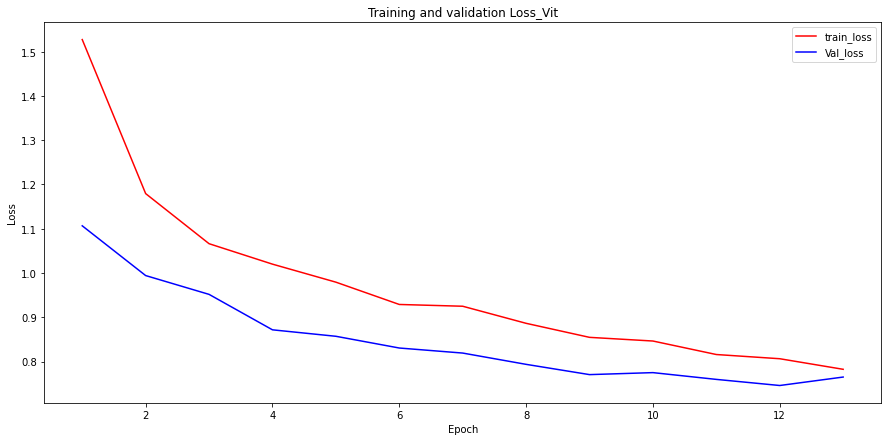

In [ ]:
epoch = np.arange(1,14)
plt.figure(figsize=(15,7))
plt.plot(epoch ,loss, 'r' ,  label = 'train_loss')
plt.plot(epoch , val_loss, 'b' , label = 'Val_loss')
plt.title('Training and validation Loss_Vit')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.yticks(np.arange(0.6 , 1) )
plt.legend();

In [ ]:
images_name_filtered = sorted(os.listdir(cleaned_path))

In [ ]:
for i in range (len(images_name_filtered)):
  images_name_filtered[i] = images_name_filtered[i].replace('.jpg','')

In [ ]:
images_name_filtered[0:10]

['ZJ000003',
 'ZJ000005',
 'ZJ000011',
 'ZJ000012',
 'ZJ000017',
 'ZJ000023',
 'ZJ000024',
 'ZJ000028',
 'ZJ000032',
 'ZJ000052']

In [ ]:
def test_normalize(image):
    image = image/255.
    return image

In [ ]:
test_directory = '/content/drive/MyDrive/ieee-final-round/test_filtered'

In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory= test_directory,
    labels=None,
    label_mode=None,
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256), # change this to 256
    shuffle=False,
    seed=42,
    interpolation='bilinear',
    follow_links=False,
)

Found 3759 files belonging to 1 classes.


In [ ]:
test_data = test_data.map(test_normalize)

In [ ]:
results = vit_model.predict(test_data)

In [ ]:
sub1 = pd.DataFrame(results,columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard','monkey_prosimian', 'rodent'] )

In [ ]:
sub1['id'] = images_name_filtered

In [ ]:
df = sub1[['id','antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard','monkey_prosimian', 'rodent']]

In [ ]:
df.to_csv('/content/drive/MyDrive/ieee-final-round/vit_final.csv' , index = False)